# Ch2 Python 基礎，IPython 和 Jupyter notebook

## 2.2 IPython 基礎

### 。內省
* 物件內省(object introspection)
* 可以顯示該物件的資訊
* 用法:
    * object? or object??
    * 使用??會將函式原始碼盡可能顯示出來
    * 若函式有定義docstring，則使用?後就會將docstring顯示出來
    * 可以結合萬用字元(\*)來對IPython空間進行搜尋，找到所有合乎條件的名稱

In [1]:
import numpy as np

In [1]:
b = [1,2,3]

In [2]:
b?

In [3]:
def add_numbers(a, b):
    """
    Add two numbers together
    
    Returns
    -------
    the sum: type of arguments
    """
    return a + b

In [4]:
add_numbers?

In [5]:
add_numbers??

In [1]:
import numpy as np
np.*load*?  # 可以找到numpy內中名稱含有load的函式

## 。 %run 命令
* 可以執行程式碼檔案
* %run python_file.py
* 檔案中定義的所有變數(引入、函式、全域變數)之後皆可在IPython shell中存取

## 。 %load 命令
* 可以將一個腳本載入到程式碼cell中

## 。 中斷執行程式
* 任何城市執行中按下Ctrl + c就會觸發KeyboardInterrupt

## 。 執行剪貼簿中的程式
* %paste 會將剪貼簿中的任何文字視為單一程式碼區塊執行
* %cpaste 功能與 %paste 類似，只是在貼上的程式碼前面會有提示字元

## 。 Matplotlib整合
* %matplotlib inline
* 可以notebook內顯示圖形

# Ch3 內建資料結構、函式與檔案

## 3.1資料結構和檔案

## 。Tuple
* 是一個固定長度，immutable的物件序列
* 建立方法: 將序列用逗號分隔在小括號中
* tuple建立後就不能再更改
* tuple()可將任何序列或迭代器轉化為tuple
* 可用[]索引取得內部元素
* 使用 + 運算子可將兩個tuple結合成一個更長的tuple
* 若將 tuple 乘上一個整數，會將tuple內的元素重複若干遍
    * 重複的物件是參照，並不是拷貝

In [3]:
tup = 4, 5, 6

In [4]:
tup

(4, 5, 6)

In [5]:
nested_tup = (4, 5, 6), (7, 8)
nested_tup

((4, 5, 6), (7, 8))

In [6]:
# tuple()可將任何序列或迭代器轉化為tuple
tuple([4, 0, 2])

(4, 0, 2)

In [8]:
tup = tuple("string")
tup

('s', 't', 'r', 'i', 'n', 'g')

In [9]:
tup[0]

's'

In [11]:
# 使用 + 運算子可將兩個tuple結合成一個更長的tuple
(4, None, 'foo') + (6, 0) + ('bar',)

(4, None, 'foo', 6, 0, 'bar')

In [12]:
# 若將 tuple 乘上一個整數，會將tuple內的元素重複若干遍
('foo', 'bar') * 4

('foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'bar')

## 。拆掉Tuple
* 將tuple指定給一串排列如tuple的變數，python會將等號右邊的tuple拆分給那些變數
* 使用時機:
    * 對list所組成的tuple做迭代
    * 多個值回傳

In [13]:
tup = (4, 5, 6)
a, b, c = tup
b

5

In [15]:
tup = 4, 5, (6, 7)
a, b, (c, d) = tup
c

6

In [17]:
values = 1, 2, 3, 4, 5, 6
a, b, *rest = values
a, b

(1, 2)

In [18]:
rest

[3, 4, 5, 6]

In [16]:
seq = [(1, 2, 3), (4, 5, 6), (7, 8, 9)]

for a, b, c in seq:
    print(F"a = {a}, b = {b}, c = {c}")

a = 1, b = 2, c = 3
a = 4, b = 5, c = 6
a = 7, b = 8, c = 9


## 。Tuple方法

* count(element) -> 計算tuple內的element有幾個

In [19]:
a = (1, 2, 2, 2, 3, 4, 5)
a.count(2)

3

## 。 List
* 長度可變，內容也可變
* 使用中括號[]來定義一個list
* 常被用來實體化一個迭代器或是產生器
* 在list中，Python使用線性方法掃過所有值 -> 速度較dict 與 set 慢許多

In [21]:
a_list = [2, 3, 7, None]
print(F"{a_list}, type: {type(a_list)}")

[2, 3, 7, None], type: <class 'list'>


In [22]:
tup  =(1, 2, 3, 4)
b_list = list(tup)
print(F"{b_list}, type: {type(b_list)}")

[1, 2, 3, 4], type: <class 'list'>


In [23]:
b_list[1] = "van"
print(F"{b_list}, type: {type(b_list)}")

[1, 'van', 3, 4], type: <class 'list'>


In [24]:
gen = range(10)
gen

range(0, 10)

In [25]:
list(gen)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

## 。加入或移除元素


* append(element) -> 可將element加入list尾端

In [26]:
b_list.append("AA")
b_list

[1, 'van', 3, 4, 'AA']

* insert(index, element) -> 可將element插入list內，位置為index的地方
* 0 <= index <= list長度
* insert的計算量比append高得多(須將後方元素參照位移到更後面)，若需要將元素插入到最前或最後 -> 使用collections.deque -> 雙向串列

In [27]:
b_list.insert(1, "BB")

In [28]:
b_list

[1, 'BB', 'van', 3, 4, 'AA']

* pop(index) -> 移除index的元素並回傳它

In [29]:
b_list.pop(2)

'van'

In [30]:
b_list

[1, 'BB', 3, 4, 'AA']

* remove(element) -> 刪除第一個匹配的元素

In [31]:
b_list.append("BB")
b_list

[1, 'BB', 3, 4, 'AA', 'BB']

In [32]:
b_list.remove("BB")
b_list

[1, 3, 4, 'AA', 'BB']

* 使用 + 將兩個list相加在一起

In [33]:
[4, None, "foo"] + [7, 8, (2, 3)]

[4, None, 'foo', 7, 8, (2, 3)]

* 使用 extend()方法一次加入多個元素

In [34]:
x = [4, None, "foo"]
x

[4, None, 'foo']

In [35]:
x.extend([7, 8, (2, 3)])

In [36]:
x

[4, None, 'foo', 7, 8, (2, 3)]

* 使用 + 時會開一個新的list，並將要合併的list全部複製過去 -> 運算成本高
* 利用extend() -> 推薦

## 。排序

* list.sort(key) -> 直接對原list進行排序(in-place: 原地的)，可以指定排序鍵值(sort key) -> 排序的依據

In [37]:
b = ['saw', 'small', 'He', 'Foxes', 'six']
b.sort(key=len)
b

['He', 'saw', 'six', 'small', 'Foxes']

## 。二元搜尋以及維護已排序list

* 內建 bisect 模組可以對已排序list進行二元搜尋及插入
* bisect.bisect(list, value) -> 用來找到元素應插入的位置並不破壞原有順序 -> 只回傳數值不插入
* bisect.insort(list, value) -> 用來實際插入元素到該位置的動作 -> 會將元素插入到物件裡
* 由於檢查list是否已排序的成本太過昂貴，因此bisect<font color = red>並不會檢查list是否已排序</font> -> 使用未排序的list會導致得到錯誤的結果

In [38]:
import bisect
c = [1, 2, 2, 2, 3, 4, 7]

In [42]:
bisect.bisect(c, 2)  # 只回傳元素該插入的index
print(F"The index of element should be inserted: {bisect.bisect(c, 2)}, the list: {c}")

The index of element should be inserted: 4, the list: [1, 2, 2, 2, 3, 4, 7]


In [43]:
print(F"The index of element should be inserted: {bisect.bisect(c, 6)}, the list: {c}")

The index of element should be inserted: 6, the list: [1, 2, 2, 2, 3, 4, 7]


In [44]:
# bisect.insort(list, value) -> 回傳None, 並將value實際插入到list內
print(F"The index of element should be inserted: {bisect.insort(c, 6)}, the list: {c}")

The index of element should be inserted: None, the list: [1, 2, 2, 2, 3, 4, 6, 7]


## 。切片


* list[start: end: step]:  
    * start: 起始值:  
        * 從起始值開始切片
        * 不寫 -> 從頭開始
    * end: 結尾值:  
        * 到結尾值-1停止
        * 不寫 -> 到序列結尾
    * step: 步進值:  
        * 每隔幾步取值
        * 不寫 -> 預設為1
        * -1 -> 可將序列反轉

In [47]:
seq = [1,2,3,4,5,6,7,8,9]
seq[1:5]

[2, 3, 4, 5]

In [48]:
seq[: 3]

[1, 2, 3]

In [49]:
seq[2: ]

[3, 4, 5, 6, 7, 8, 9]

* 序列給值

In [46]:
seq[3:4] = ['a', 'b']
seq

[1, 2, 3, 'a', 'b', 5, 6, 7, 8, 9]

* 負值索引 -> 從尾端開始算，倒數第一個元素索引為-1，倒數第二個元素索引為-2

In [50]:
seq[-1]

9

In [51]:
seq[-4: -1]

[6, 7, 8]

In [52]:
seq[-6: ]

[4, 5, 6, 7, 8, 9]

In [53]:
seq[::2]

[1, 3, 5, 7, 9]

In [55]:
print(F"seq: {seq}, seq[-1]: {seq[::-1]}")

seq: [1, 2, 3, 4, 5, 6, 7, 8, 9], seq[-1]: [9, 8, 7, 6, 5, 4, 3, 2, 1]


## 。內建序列函式

###  。enumrate
* 回傳(index, value) -> 回傳元素為value的索引index

In [57]:
some_list = ['foo', 'van', 'kevin']
mapping = {}
for index, value in enumerate(some_list):
    mapping[value] = index
    print(F"index: {index}, value: {value}")

mapping

index: 0, value: foo
index: 1, value: van
index: 2, value: kevin


{'foo': 0, 'van': 1, 'kevin': 2}

### 。sorted
* 將序列排序後，回傳一個新序列
* 處理方式與list一樣

In [59]:
a_list = [2,4,8,3,1,5,98,5,531,5]
b_list = sorted(a_list)
b_list

[1, 2, 3, 4, 5, 5, 5, 8, 98, 531]

In [63]:
sort_str_list = sorted('Hi, how are you?')
sort_str_list

[' ',
 ' ',
 ' ',
 ',',
 '?',
 'H',
 'a',
 'e',
 'h',
 'i',
 'o',
 'o',
 'r',
 'u',
 'w',
 'y']

### 。zip
* 可將list、tuple或其他序列的元素配對，並建立一個新的物件
    * 須利用生成器(list(), tuple(), set(), dict())將zip所傳回的物件產生出來

In [74]:
seq1 = ['foo', 'van', 'sss']
seq2 = ['aaa', 'ccd', 'asd']
zipped = zip(seq1, seq2)
print(zipped)
print(F"list: {list(zipped)}, \ntuple: {tuple(zip(seq1, seq2))}, \nset: {set(zip(seq1, seq2))}, \ndict: {dict(zip(seq1, seq2))}" )

list: [('foo', 'aaa'), ('van', 'ccd'), ('sss', 'asd')], 
tuple: (('foo', 'aaa'), ('van', 'ccd'), ('sss', 'asd')), 
set: {('foo', 'aaa'), ('van', 'ccd'), ('sss', 'asd')}, 
dict: {'foo': 'aaa', 'van': 'ccd', 'sss': 'asd'}


* 可接受任意數量的序列物件，並以<font color=yellow>最短的序列物件</font>決定產生的長度

In [75]:
seq3 = ['k', 'e']
zipped = zip(seq1, seq2, seq3)
list(zipped)

[('foo', 'aaa', 'k'), ('van', 'ccd', 'e')]

* 可用來<font color=yellow>解包序列</font> -> 類似列轉為行

In [77]:
pic = [('van', 'kevin'), ('aa', 'bb'), ('aaaa', 'cccc')]
first, second = zip(*pic)
print(F"first: {first}, second: {second}")

first: ('van', 'aa', 'aaaa'), second: ('kevin', 'bb', 'cccc')


### 。reversed
* 可將序列做反向迭代

In [79]:
list(reversed(range(10)))

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

## 。dict

* 可以儲存任意大小的鍵值對(key-value pair)
* {key: value}

In [98]:
d1 = {'a': 'first', 'b': 'second', 'c': [1,2,3,4]}
print(F"{d1}, type: {type(d1)}")

{'a': 'first', 'b': 'second', 'c': [1, 2, 3, 4]}, type: <class 'dict'>


* 存取方式與list、tuple相同

In [99]:
d1['d'] = (5,5,5)
d1

{'a': 'first', 'b': 'second', 'c': [1, 2, 3, 4], 'd': (5, 5, 5)}

* 檢查方式與list、tuple相同

In [100]:
print(F"{1 in d1}, {'c' in d1}")

False, True


* 刪除值(與list, tuple相同):
    * del dict[index] -> 不會回傳被刪除的值
    * pop dict[index] -> 會回傳被刪除的值

In [101]:
d1

{'a': 'first', 'b': 'second', 'c': [1, 2, 3, 4], 'd': (5, 5, 5)}

In [102]:
del d1['a']
d1

{'b': 'second', 'c': [1, 2, 3, 4], 'd': (5, 5, 5)}

In [103]:
a = d1.pop('c')
print(F"a: {a}, d1: {d1}")

a: [1, 2, 3, 4], d1: {'b': 'second', 'd': (5, 5, 5)}


* dict.keys() -> 取回dict的所有key
* dict.values() -> 取回dict的所有value

In [105]:
list(d1.keys())

['b', 'd']

In [106]:
list(d1.values())

['second', (5, 5, 5)]

### 。 get方法

* value = dict.get(key, default_value):
    * key在dict裡 -> 回傳對應key的value(= 回傳dict[key])
    * key不在dict裡 -> 回傳defalut_value
    * default_value 預設是 None

In [110]:
d1 = {'a': 1, 'b': 2, 'c': 3, 'd': 4}
value = d1.get('a', "a not in dict")
print(value)
value2 = d1.get('e', "e not in dict")
print(value2)
value3 = d1.get('ff')
print(value3)

1
e not in dict
None


### 。setdefault方法
* dict.setdefault(key, default=None):
    * key存在於dict時，回傳dict[key]
    * key不存在於dict時， 回傳defalut

In [116]:
words = ['apple', 'abandon', 'another', 'cat', 'dog', 'default', 'decrease']
by_first_letter = {}
by_first_letter2 = {}

# 不使用setdefault方法
for word in words:
    letter = word[0]
    if letter in by_first_letter:
        by_first_letter[letter].append(word)
    else:
        by_first_letter[letter] = [word]
        
# 使用setdeaulte方法
for word in words:
    letter = word[0]
    by_first_letter2.setdefault(letter, []).append(word)
print(F"by_first_letter: {by_first_letter},\nby_first_letter2: {by_first_letter2}")

by_first_letter: {'a': ['apple', 'abandon', 'another'], 'c': ['cat'], 'd': ['dog', 'default', 'decrease']},
by_first_letter2: {'a': ['apple', 'abandon', 'another'], 'c': ['cat'], 'd': ['dog', 'default', 'decrease']}


* 使用defalutdict類別

In [118]:
from collections import defaultdict
by_letter3 = defaultdict(list)
print(by_letter3)

for word in words:
    by_letter3[word[0]].append(word)
    
print(by_letter3)

defaultdict(<class 'list'>, {})
defaultdict(<class 'list'>, {'a': ['apple', 'abandon', 'another'], 'c': ['cat'], 'd': ['dog', 'default', 'decrease']})


### dict的合法key型態
* key -> 須為immutable物件 -> 具有hash能力(hashability)

## 。set

* 是一個無序不重複的集合
* set{}
* 內容必須為immutable

In [119]:
set([1,1,2,3,4,4,4,4,4,5,6,7,8,9])

{1, 2, 3, 4, 5, 6, 7, 8, 9}

* set支持數學中的集合運算:

|函式|等效語法|描述|
|::|::|::|
|a.add()|N/A|將元素x加入集合a|
|a.clear()|N/A|將集合a清空|
|a.remove(x)|N/A|把元素x從a中移除|
|a.pop()|N/A|從a中移除隨機元素，若a為空集合則拋出例外KeyError|
|a.union(b)|a \| b|a與b的聯集(a、b中的不重複元素)|
|a.update(b)|a \|= b|指定集合a的內容為a與b的聯集|
|a.intersection(b)|a & b|集合a與b中同時存在的元素(a、b的交集)|
|a.intersection_update(b)|a &= b|指定集合a的內容為a、b的交集|
|a.difference(b)|a - b|在集合a內但不在b內的元素|
|a.difference_update(b)|a -= b|將集合a的內容指定為在集合a內但不在b內的元素|
|a.symmetric_difference(b)|a ^ b|在集合a、b內的所有元素，且不能夠<font color=yellow>同時存在</font>|
|a.symmetric_difference_update(b)|a ^= b|將集合a指定為集合a、b內的所有元素，且不能夠<font color=yellow>同時存在</font>|
|a.issubset(b)|N/A|如果集合a的所有元素都包含在b中，回傳True|
|a.issuperset(b)|N/A|如果集合a的所有元素都被包含在b中，回傳True|
|a.isdisjoint(b)|N/A|如果集合a、b沒有重複的元素，回傳True|

## 。List, Set 及Dict的包含式

* 包含式:
    * 使用精簡的語法即可從一個序列中取出想要的元素，並轉變為新的collection
    * [express for value in collection if condition] -> list
    * {express for value in collection if condition} -> set
    * {key: value for value in collection if condition} -> dict

[express for value in collection if condition] 等同於:
<br><br>result = []
<br><br>for val in collection:  
<br>&emsp;if condition:  
<br>&emsp;&emsp;result.append(expr)

In [1]:
strings = ['a', 'as', 'bat', 'car', 'dove', 'python']
[x.upper() for x in strings if len(x) > 2]

['BAT', 'CAR', 'DOVE', 'PYTHON']

In [3]:
# 找出strings內所有元素的長度
unique_lengths = {len(x) for x in strings}
unique_lengths

{1, 2, 3, 4, 6}

### 。map(function, iteration)
* 將iteration內的元素放入function並回傳執行結果

In [4]:
# 使用map函式實作出上一個cell的結果
set(map(len, strings))

{1, 2, 3, 4, 6}

In [5]:
# 用dict生成式找出strings內的index
loc_mapping = {val: index for index, val in enumerate(strings)}
loc_mapping

{'a': 0, 'as': 1, 'bat': 2, 'car': 3, 'dove': 4, 'python': 5}

## 。巢式list包含式

* 假設我們需要從一個list內找出所有名稱字母內含有2個e以上的人名

In [20]:
# name list
all_data = [['John', 'Emily', 'Michael', 'Mary', 'Steven'],
            ['Maria', 'Juan', 'Javier', 'Natalia', 'Pilar']]

In [21]:
# 法1 -> for迴圈
names_of_interest = []

for names in all_data:
    have_2_e = [name for name in names if name.count('e') >= 2]
    # extend() -> 將object內的elements逐一放入list
    # append() -> 直接將整個object放入list
    names_of_interest.extend(have_2_e)
    
names_of_interest

['Steven']

In [22]:
# 法2 -> nested list
names_of_interest2 = [name for names in all_data for name in names if name.count('e') >= 2]
names_of_interest2

['Steven']

* 將一個整數tuple的list '壓扁' 成單一整數list

In [26]:
some_tuples = [(1, 2, 3), (4, 5, 6), (7, 8, 9)]

flattened = [element for tup in some_tuples for element in tup]
flattened


# flattened = []

# for tup in some_tuples:
#     for element in tup:
#         flattened.append(element)


[1, 2, 3, 4, 5, 6, 7, 8, 9]

* 將tuple換成list

In [25]:
[[element for element in tup] for tup in some_tuples]

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]

## 3.2 函式
* 若函示沒有return，則自動回傳None
* 參數分為2種:
    * 位置參數(positional) 
    * 關鍵字參數(keyword)   -> 常用在預設值或可選參數的狀況

def my_function(x, y, z=1.5):
<br>&emsp;if z > 1:
<br>&emsp;&emsp;return z * (x + y)
<br>&emsp;else:
<br>&emsp;&emsp;return z / (x + y)


<br>x, y -> 位置參數
<br>z -> 關鍵字參數

In [28]:
def my_function(x, y, z=1.5):
    if z > 1:
        return z * (x + y)
    else:
        return z / (x + y)
    
print(my_function(5, 6, z=0.7))
print(my_function(3.14, 7, 3.5))
print(my_function(10, 20))

0.06363636363636363
35.49
45.0


## 。多個回傳值

In [30]:
def f():
    a = 5
    b = 6
    c = 7
    return a, b, c

return_value = f()
return_value

(5, 6, 7)

In [31]:
def f():
    a = 5
    b = 6
    c = 7
    return {'a': a, 'b': b, 'c': c}

return_value = f()
return_value

{'a': 5, 'b': 6, 'c': 7}

## 。函式即物件

* 對以下data進行清理

In [36]:
states = ['   Alabama', 'Georgia!', 'Georgia', 'georgia', 'FlOrIda',
          ' south    carolina##', 'West virginia?']

In [37]:
import re

# 單純函式處理
def clean_strings(strings):
    result = []
    
    for value in strings:
        value = value.strip()  # 去掉頭尾換行符號及空白
        value = re.sub('[!#?]', '', value)  # 將value中的!#?符號以''取代
        value = value.title()
        result.append(value)
    
    return result

clena_strings(states)

['Alabama',
 'Georgia',
 'Georgia',
 'Georgia',
 'Florida',
 'South    Carolina',
 'West Virginia']

In [38]:
# 將會用到的function寫成list再逐一呼叫 -> pipeline
# 具有更高的功能性
def remove_punctuation(value):
    return re.sub('[!#?]', '', value)  # 將value中的!#?符號以''取代

# 將函式以物件的方式存進list
clean_ops = [str.strip, remove_punctuation, str.title]

def clean_strings2(strings, ops):
    result = []
    
    for value in strings:  # 逐一呼叫element
        for function in ops:  # 逐一呼叫ops內的function物件
            value = function(value)  # 將element放入function內處理
        result.append(value)
        
    return result

In [40]:
clean_strings2(states, clean_ops)

['Alabama',
 'Georgia',
 'Georgia',
 'Georgia',
 'Florida',
 'South    Carolina',
 'West Virginia']

## 。匿名函式lambda
* 將只有一行程式敘述句寫成函式方法，其值等於回傳值
* 以<font color=yellow>lambda</font>關鍵字宣告
* lambda 沒有 <font color=yellow>\__name\__</font>屬性

In [43]:
def apply_to_list(some_list, f):
    return [f(x) for x in some_list]

ints = [4, 0, 1, 5, 6]

apply_to_list(ints, lambda x: x * 2)

[8, 0, 2, 10, 12]

* 將下列data以有多少不同字母進行排序

In [44]:
strings = ['foo', 'card', 'bar', 'aaaa', 'abab']

strings.sort(key=lambda x: len(set(list(x))))
strings

['aaaa', 'foo', 'abab', 'bar', 'card']

## 柯里化(Currying)
* 只給現有函式<font color=yellow>部分變數</font>，之後衍生出新函式的動作

In [1]:
# original function
def add_numbers(x, y):
    return x + y

# new function
add_five = lambda y: add_numbers(5, y)

# 以內建方法partial簡化上述流程
from functools import partial
add_five = partial(add_numbers, 5)

## 產生器(Generator)
* 用統一的行為對序列(或檔案內容)進行迭代
* 由<font color=yellow>迭代器協定(iterator protocol)</font>所完成 -> 是一種讓物件可以迭代的通用方法

In [2]:
some_dict = {'a': 1, 'b': 2, 'c': 3}

for key in some_dict:
    print(key)

a
b
c


* for key in some_dict -> Python會建立一個迭代器: dict_iterator = iter(some_dict)
* 迭代器可接受任何可迭代物件

In [4]:
dict_iterator = iter(some_dict)
dict_iterator

* 產生器與一般函式不同，它可以回傳多個結果序列，每回傳一個就停一下，直到下一個要求才繼續回傳
* 產生器的建立須以 <font color=yellow>yield</font> 取代 return

In [5]:
def squares(n=10):
    print(F"Generating squares from 1 to {n ** 2}")
    
    for i in range(1, n+1):
        yield i ** 2

* 直接呼叫產生器不會執行任何程式碼

In [6]:
gen = squares()
gen

<generator object squares at 0x000002136F6EC900>

* 直到向產生器要求元素時，才開始執行程式

In [7]:
for x in gen:
    print(x, end=' ')

Generating squares from 1 to 100
1 4 9 16 25 36 49 64 81 100 

## 產生器述句(Generator expression)
* 與生成式很像，但是外面的括號微小括號

In [11]:
"""
def make_gen():
    for x in range(100):
        yield ** 2

gen = make_gen()
"""

# 等同於
gen = (x ** 2 for x in range(100))
gen

<generator object <genexpr> at 0x000002136F6ECEB0>

* 產生器述句可以用來取代list生成式用在函式參數的情況

In [12]:
sum(x ** 2 for x in range(100))

328350

In [13]:
dict((i, i ** 2) for i in range(5))

{0: 0, 1: 1, 2: 4, 3: 9, 4: 16}

## itertools模組
* itertools內有一群常見資料演算法的產生器集合
* groupby(sequence, function) -> 可以接受任意序列以及一個函式當參數，依照函式回傳值將序列中連續元素進行分組

In [18]:
from itertools import groupby as gp

first_letter = lambda x: x[0]

names = ['Alan', 'Adam', 'Wes', 'Will', 'Albert', 'Steven']

for letter, names in gp(names, first_letter):
    print(F"{letter}: {list(names)}")  # names是產生器

A: ['Alan', 'Adam']
W: ['Wes', 'Will']
A: ['Albert']
S: ['Steven']


## 錯誤及例外處理

* 捕捉單一例外 -> try/except區塊

In [19]:
def attempt_float(x):
    try:
        return float(x)
    except ValueError:
        return x

In [20]:
attempt_float('somethong')

'somethong'

In [21]:
attempt_float(11235)

11235.0

In [22]:
attempt_float((1, 2))

(1, 2)

* 捕捉多個例外 -> 需用tuple形式將Error包入

In [24]:
def attempt_float(x):
    try:
        return float(x)
    except (ValueError, TypeError):
        return x

* 在try中的程式不管成功於否都須執行一些東西 -> finally

In [27]:
f = open("a fake path", 'w')

try:
    wirte_to_file(f)  # 嘗試將資料寫入f
except:
    print("Failed")  # 若是失敗則印出Failed
else:
    print("Succeeded")  # 成功則印出Succeeded
finally:
    print("Close file stream")
    f.close()  # 不管成功於否都關閉檔案串流

Failed
Close file stream


# 3.3 檔案和作業系統

In [28]:
path = r'D:\Python\practice_every_day\Python資料分析\test.txt'

* f = open(path) -> 打開path的檔案
* f.close() -> 關閉檔案串流

In [30]:
f = open(path)

for line in f:
    pass

f.close()

* 從檔案中取出的所有行，都包含end-of-line(EOF)標記

In [34]:
f = open(path)

lines = [x.rstrip() for x in open(path)]

f.close()

lines

["Dear students, you can do better than watching movies on your laptop in bed. If you want to truly be immersed in a film (or game, or TV show), nothing beats a large TV. And it turns out, you don't have to invest thousands to get started with a decent dorm entertainment system. LCD sets and streaming devices are cheaper than ever. So save that notebook for schoolwork consider these inexpensive ways to upgrade your movie watching experience."]

* with述句 -> 會在檔案生命週期結束後自動關閉串流

In [35]:
with open(path) as f:
    lines = [x.rstrip() for x in f]
    
lines

["Dear students, you can do better than watching movies on your laptop in bed. If you want to truly be immersed in a film (or game, or TV show), nothing beats a large TV. And it turns out, you don't have to invest thousands to get started with a decent dorm entertainment system. LCD sets and streaming devices are cheaper than ever. So save that notebook for schoolwork consider these inexpensive ways to upgrade your movie watching experience."]

* read(int) 方法:
    * 預設開啟方法下，會回傳特定的字元數量
    * 若是以二進制開啟檔案 -> 回傳位元組數

In [36]:
with open(path) as f:
    print(f.read(10))

Dear stude


In [40]:
with open(path, 'rb') as f2:
    print(f2.read(20))

b'Dear students, you c'


* tell()方法 -> 顯示目前位置

In [39]:
with open(path) as f:
    print(f.tell())

0


### python檔案模式
|模式|描述|
|:--:|:------------------------------------------------:|
|r|唯獨模式|
|w|只能寫模式，建立新檔(消除同名檔案內的資料)|
|x|只能寫模式，建立新檔，若檔案已存在則拋出錯誤|
|a|在已存在檔案後增加資料(若不存在則建立新檔)|
|r+|讀寫模式|
|b|二進位檔案標示，加在其他模式後面('rb' 或 'wb')|
|t|文字模式(自動解碼為Unicode，預設模式)，可與其他模式使用('rt' 或 'xt')|

* 將文字寫到檔案中 -> 可使用write或writelines方法

In [69]:
with open(path, 'r') as f:
    text = f.readlines()
    
text

['Hi, my name is Van.\n',
 '\n',
 'This is my practice file.\n',
 '\n',
 'OOO\n',
 '\n',
 'D\n',
 '\n',
 '\n',
 'DFDF']

In [70]:
list(map(len, text))

[20, 1, 26, 1, 4, 1, 2, 1, 1, 4]

In [76]:
path2 = r'D:\Python\practice_every_day\Python資料分析\test2.txt'

with open(path2, 'w') as f:  # 路徑若相同會無法寫入且原始檔案被消除
    f.writelines(x for x in open(path) if len(x) > 1)  # 去掉空白行

In [77]:
with open(path2) as f:
    lines = f.readlines()
    
lines

['Hi, my name is Van.\n',
 'This is my practice file.\n',
 'OOO\n',
 'D\n',
 'DFDF']

## python檔案方法或屬性
|方法|描述|
|:---------------------:|:------------------------------------:|
|read([size])|檔案中資料以字串回傳，可選擇輸入size參數 -> 指定要讀多少位元組|
|readlines([size])|回傳檔案中多行，可選擇輸入size|
|write(str)|將傳入的字串寫到檔案|
|writelines(strings)|將傳入的字串序列寫到檔案|
|close()|關閉串流|
|flush()|沖出內部I/O緩衝資料到磁碟|
|seek(pos)|移動檔案位置(游標位置)|
|tell()|回傳目前檔案位置(游標位置)|
|closed|如果檔案已關閉，回傳True|

## 檔案中的位元組與Unicode
* 檔案的預設行為(不管讀取或寫入)都是文字模式(t)

In [78]:
with open(path) as f:
    chars = f.read(10)
    
chars

'Hi, my nam'

In [79]:
with open(path, 'rb') as f:
    data = f.read(10)
    
data

b'Hi, my nam'

* 指定encoding選項，方便從Unicode換到其他編碼方式

In [82]:
path3 = r'D:\Python\practice_every_day\Python資料分析\test3.txt'
with open(path) as source:
    with open(path3, 'xt', encoding='iso-8859-1') as sink:
        sink.write(source.read())

In [83]:
with open(path3, encoding='iso-8859-1') as f:
    print(f.read(10))

Hi, my nam


* 若檔開檔案時不是使用二進位模式 -> <font color=yellow>使用seek()會出錯</font>

# <font color=yellow>Ch4 Numpy基礎: 陣列和向量化計算</font>
* numpy的特性有:
    * ndarray: 高效率的多維度陣列，能夠做快速陣列導向數學運算及彈性的<font color=green,white>廣播機制(broadcasting)</font>
    * 不用寫迴圈就可以對整個資料陣列做快速數學運算
    * 利用memory-mapped檔案，做讀取/寫出陣列資料到磁碟工具
    * 線性代數，隨機數字生成器及傅立葉轉換
    * 用C、C++或Fortran寫成的C API函式庫

In [2]:
# numpy 與 一般python 具有很大的速度差異
import numpy as np

my_arr = np.arange(1000000)  # numpy物件

my_list = list(range(1000000))  # list物件

* 將上面2個物件全部乘上2

In [85]:
%time for _ in range(10): my_arr2 = my_arr * 2

Wall time: 34.9 ms


In [86]:
%time for _ in range(10): my_list2 = [x * 2for x in my_list]

Wall time: 2.12 s


## 4.1 <font color=yellow>Numpy ndarray: 多維陣列物件</font>

* 產生一隨機資料小陣列並做運算

In [87]:
data = np.random.randn(2, 3)  # 產生row=2, column=3的隨機值陣列物件
data

array([[ 0.2035581 , -0.08280468,  1.15316973],
       [-0.16845808,  0.04049118, -1.94574498]])

In [88]:
data * 10

array([[  2.03558095,  -0.82804685,  11.53169732],
       [ -1.68458082,   0.40491183, -19.45744979]])

In [89]:
data + data

array([[ 0.40711619, -0.16560937,  2.30633946],
       [-0.33691616,  0.08098237, -3.89148996]])

In [90]:
data.shape

(2, 3)

In [91]:
data.dtype

dtype('float64')

## 建立ndarray
* 使用array(sequence)

In [96]:
data1 = [6, 73,5.3, 1, 212]

arr1 = np.array(data1)

arr1

array([  6. ,  73. ,   5.3,   1. , 212. ])

In [101]:
data2 = [[1,2,3,4], [5,6,7,8]]

arr2 = np.array(data2)

arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

* 除非明確指定，否則np.array會自動尋找適當的資料型態

In [102]:
arr1.dtype

dtype('float64')

In [103]:
arr2.dtype

dtype('int32')

* 使用zeros建立全為0的陣列
* 使用ones建立全為1的陣列
* 使用empty建立無初始值的陣列(但是會有垃圾值)
* 建立高維度陣列 -> 將維度放入tuple再傳進去

In [104]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [105]:
np.zeros((3, 6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [106]:
np.empty((2, 3, 2))

array([[[1.12768922e-311, 2.47032823e-322],
        [0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 1.04082753e-047]],

       [[5.58072387e-091, 1.42023784e+161],
        [5.50778244e+169, 1.31333861e-071],
        [3.99910963e+252, 1.51915485e-051]]])

* np.arange(int) -> 類似python的range函式，但是是陣列值版本

In [107]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

## 陣列建立函式
|函式|描述|
|:|:-:|
|array|將輸入資料(list, tuple, array或其他序列型態)轉換為ndarray，可以使用dtype或是明確指定dtype，預設複製所有輸入資料|
|asarray|將輸入轉為ndarray，但如果輸入已經是ndarrya，則不進行複製|
|arange|功能類似range，但是回傳的是ndarray而不是list|
|ones, ones_like|依指定的shape和dtype產生充滿1的陣列，ones_like可依輸入的另一陣列產生相同shape及dtype且充滿1的陣列|
|zeros, zeros_like|依指定的shape和dtype產生充滿0的陣列，zeros_like可依輸入的另一陣列產生相同shape及dtype且充滿0的陣列|
|empty, empty_like|取得新記憶體建立新陣列，但不像ones和zeros一樣填充固定值|
|full, full_like|指定要填充的值，依指定的shape和dtype建立新陣列，full_like可依輸入的另一陣列產生相同shape及dtype且完成填充值的陣列|
|eye, identity|建立一個NxN的單位矩陣(主對角線為1，其他為0)|

## ndarray的資料型態
* ndarray的資料型態就是dtype -> 含有ndarray所需資訊(metadata: 資料的資料)
* 陣列資料需要這些資訊才能將一大塊記憶體解析成特定型態的資料

In [108]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr1

array([1., 2., 3.])

In [109]:
arr1.dtype

dtype('float64')

In [111]:
arr2 = np.array([1, 2, 3], dtype=np.int64)
arr2

array([1, 2, 3], dtype=int64)

In [112]:
arr2.dtype

dtype('int64')

* dtype提供了對底層磁碟或記憶體的<font color=yellow>映射對應</font>，有了這個映射後，讀取或寫入資料的數據串流到磁碟，或是與低階的C或Fortran語言連結就變得容易多了
* dtype型態: 前面為類型名稱(float, int...)，後面為數字，代表每個元素佔幾位元

* astype(dtype) -> 可以將一個資料陣列從一個dtype轉換(cast)到另一個
* 使用astype一定會建立一個新陣列(資料會複製過去)

In [113]:
arr = np.array([1, 2, 3, 4, 5])
arr.dtype

dtype('int32')

In [114]:
float_arr = arr.astype(np.float64)
float_arr.dtype

dtype('float64')

* 使用np.string_將字串物件轉為數值物件 -> 因此字串長度為固定的，所以可能將資料截斷且<font color=yellow>不發出任何警告</font>

In [115]:
numeric_strings = np.array(['1.25', '225', '-45'], dtype=np.string_)
numeric_strings

array([b'1.25', b'225', b'-45'], dtype='|S4')

In [117]:
numeric_strings.astype(np.float64)

array([  1.25, 225.  , -45.  ])

## numpy陣列的算術運算

* 可不用for迴圈對資料進行整批運算 -> 向量化(vectorization)
* 對相同大小陣列進行任何算術運算 -> 就是對每個元素進行動作
* 對不同大小的陣列進行動作 -> <font color=yellow>廣播(broadcasting)</font>

In [3]:
arr = np.array([[1,2,3], [4,5,6]])
arr

array([[1, 2, 3],
       [4, 5, 6]])

In [4]:
arr * arr

array([[ 1,  4,  9],
       [16, 25, 36]])

In [5]:
arr - arr

array([[0, 0, 0],
       [0, 0, 0]])

In [6]:
arr.dtype

dtype('int32')

In [7]:
arr.shape

(2, 3)

In [9]:
1 / arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [10]:
arr ** 0.5

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

In [12]:
arr2 = np.array([[0,4,1], [7,2,12]])
arr2

array([[ 0,  4,  1],
       [ 7,  2, 12]])

In [14]:
arr2 > arr

array([[False,  True, False],
       [ True, False,  True]])

## 基本的索引和切片

In [15]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [16]:
arr[5]

5

In [17]:
arr[5: 8]

array([5, 6, 7])

* 將常數指定給某個切片 -> 常數就會傳播下去
* 陣列切片就是在原本的陣列上建立一個view，資料是同一份，在view中做修改的話，也會改到原始資料

In [18]:
arr[5: 8] = 12
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

In [20]:
arr_slice = arr[5: 8]
arr_slice

array([12, 12, 12])

In [21]:
arr_slice[1] = 123456
arr

array([     0,      1,      2,      3,      4,     12, 123456,     12,
            8,      9])

In [22]:
arr_slice[:] = 64

In [23]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

* <font color=pink>想把資料複製出去而不使用view -> arr2 = arr.copy[start: end]</font>

* 在二維陣列中，每個索引只到的不再是一個元素，而是一個<font color=yellow>一維陣列</font>

In [24]:
arr2d = np.array([[1,2,3],[4,5,6],[7,8,9]])
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [25]:
arr2d[2]

array([7, 8, 9])

* 取得指定的元素:
    * arr2d[0][2]
    * arr2d[0, 2]

In [26]:
arr2d[0][2]

3

In [27]:
arr2d[0, 2]

3

* 多維陣列中，省略後面的索引 -> 回傳的物件會是較低維度的陣列，其內容對應原來高維度陣列中的資料

In [29]:
# 2x2x3
arr3d = np.array([[[1,2,3],[4,5,6]], [[7,8,9],[10,11,12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [30]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [31]:
old_values = arr3d[0].copy()
old_values

array([[1, 2, 3],
       [4, 5, 6]])

In [32]:
arr3d[0] = 42
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [33]:
arr3d[0] = old_values
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [34]:
arr3d[1, 0]

array([7, 8, 9])

## 使用切片做索引

In [35]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [36]:
arr[1: 6]

array([ 1,  2,  3,  4, 64])

In [37]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

* 二維陣列切片方法不太相同 -> 切片時沿著第一軸(0軸)，每個切片就會沿著軸把一整個區域間的元素都選取
* arr2d[:2] -> 選取arr2d的開頭兩個列(row)

In [38]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

In [39]:
arr2d[1, :2]

array([4, 5])

In [41]:
arr2d[:2, 2]

array([3, 6])

In [43]:
arr2d[:, :1]

array([[1],
       [4],
       [7]])

In [44]:
arr2d[:, 0]

array([1, 4, 7])

In [47]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

In [48]:
arr2d[:2, 1:] = 0
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

## 布林索引

In [3]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [4]:
data = np.random.randn(7, 4)
data

array([[ 3.07126272e-01, -7.63939894e-01, -1.53263553e+00,
        -1.43727029e+00],
       [ 2.12501970e-03,  3.13282956e-01, -1.09223199e+00,
        -2.14111215e+00],
       [-1.55825495e+00, -6.78250464e-01,  7.25992902e-01,
        -9.53490024e-01],
       [-9.18335040e-01, -6.17433228e-01,  3.82041369e-01,
        -8.33612405e-01],
       [ 1.10761953e+00,  3.80044685e-01, -1.02899237e+00,
         2.70946008e-01],
       [-1.07478134e-01, -8.60556715e-01, -1.19515411e-01,
        -5.98478475e-01],
       [ 1.10255527e+00,  2.59274833e-01,  9.65329659e-01,
        -7.02898088e-01]])

* 把名稱是'Bob'的列選處來

In [5]:
names == 'Bob'

array([ True, False, False,  True, False, False, False])

* 將此布林索引應用在data陣列

In [6]:
data[names == 'Bob']

array([[ 0.30712627, -0.76393989, -1.53263553, -1.43727029],
       [-0.91833504, -0.61743323,  0.38204137, -0.8336124 ]])

* <font color=yellow>布林陣列和要進行索引的軸，長度必須一致</font>
* 長度不一樣時，<font color=pink>也不會失敗</font> -> 得到錯誤結果

In [7]:
data[names == 'Bob', 2:]

array([[-1.53263553, -1.43727029],
       [ 0.38204137, -0.8336124 ]])

In [8]:
data[names == 'Bob', 3]

array([-1.43727029, -0.8336124 ])

* 反向選擇:
 * !=
 * ~

In [9]:
names != 'Bob'

array([False,  True,  True, False,  True,  True,  True])

In [10]:
~(names == 'Bob')

array([False,  True,  True, False,  True,  True,  True])

In [11]:
data[~(names == 'Bob')]

array([[ 2.12501970e-03,  3.13282956e-01, -1.09223199e+00,
        -2.14111215e+00],
       [-1.55825495e+00, -6.78250464e-01,  7.25992902e-01,
        -9.53490024e-01],
       [ 1.10761953e+00,  3.80044685e-01, -1.02899237e+00,
         2.70946008e-01],
       [-1.07478134e-01, -8.60556715e-01, -1.19515411e-01,
        -5.98478475e-01],
       [ 1.10255527e+00,  2.59274833e-01,  9.65329659e-01,
        -7.02898088e-01]])

In [12]:
cond = names == 'Bob'
data[~cond]

array([[ 2.12501970e-03,  3.13282956e-01, -1.09223199e+00,
        -2.14111215e+00],
       [-1.55825495e+00, -6.78250464e-01,  7.25992902e-01,
        -9.53490024e-01],
       [ 1.10761953e+00,  3.80044685e-01, -1.02899237e+00,
         2.70946008e-01],
       [-1.07478134e-01, -8.60556715e-01, -1.19515411e-01,
        -5.98478475e-01],
       [ 1.10255527e+00,  2.59274833e-01,  9.65329659e-01,
        -7.02898088e-01]])

* 多個布林運算子可以合併成一個篩選條件 -> 使用 & 、 |
* Python 關鍵字 and 以及 or <font color=yellow>不能使用於布林索引</font>，必須使用 & 、 |

In [13]:
mask = (names == 'Bob') | (names == 'Will')
mask

array([ True, False,  True,  True,  True, False, False])

In [14]:
data[mask]

array([[ 0.30712627, -0.76393989, -1.53263553, -1.43727029],
       [-1.55825495, -0.67825046,  0.7259929 , -0.95349002],
       [-0.91833504, -0.61743323,  0.38204137, -0.8336124 ],
       [ 1.10761953,  0.38004468, -1.02899237,  0.27094601]])

* 使用布林索引時，<font color=yellow>必定會建立一份新的資料複製，回傳也一樣</font>

* 將data中的負值都設為0

In [15]:
data

array([[ 3.07126272e-01, -7.63939894e-01, -1.53263553e+00,
        -1.43727029e+00],
       [ 2.12501970e-03,  3.13282956e-01, -1.09223199e+00,
        -2.14111215e+00],
       [-1.55825495e+00, -6.78250464e-01,  7.25992902e-01,
        -9.53490024e-01],
       [-9.18335040e-01, -6.17433228e-01,  3.82041369e-01,
        -8.33612405e-01],
       [ 1.10761953e+00,  3.80044685e-01, -1.02899237e+00,
         2.70946008e-01],
       [-1.07478134e-01, -8.60556715e-01, -1.19515411e-01,
        -5.98478475e-01],
       [ 1.10255527e+00,  2.59274833e-01,  9.65329659e-01,
        -7.02898088e-01]])

In [18]:
data[data < 0] = 0

In [19]:
data

array([[0.30712627, 0.        , 0.        , 0.        ],
       [0.00212502, 0.31328296, 0.        , 0.        ],
       [0.        , 0.        , 0.7259929 , 0.        ],
       [0.        , 0.        , 0.38204137, 0.        ],
       [1.10761953, 0.38004468, 0.        , 0.27094601],
       [0.        , 0.        , 0.        , 0.        ],
       [1.10255527, 0.25927483, 0.96532966, 0.        ]])

In [20]:
data[names != "Joe"] = 7

In [21]:
data

array([[7.00000000e+00, 7.00000000e+00, 7.00000000e+00, 7.00000000e+00],
       [2.12501970e-03, 3.13282956e-01, 0.00000000e+00, 0.00000000e+00],
       [7.00000000e+00, 7.00000000e+00, 7.00000000e+00, 7.00000000e+00],
       [7.00000000e+00, 7.00000000e+00, 7.00000000e+00, 7.00000000e+00],
       [7.00000000e+00, 7.00000000e+00, 7.00000000e+00, 7.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.10255527e+00, 2.59274833e-01, 9.65329659e-01, 0.00000000e+00]])

## 花式索引

In [23]:
arr = np.empty((8, 4))

for i in range(8):
    arr[i] = i
    
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

* 以特定的順序選取陣列中的元素 -> 傳入一個用來指定順序的整數 list 或 ndarray

In [24]:
arr[[4,3,0,6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

* 傳入負數 -> 從尾端開始選列

In [25]:
arr[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

* 傳入多個索引陣列 -> 將指定的index結成tuple後，把對應位置的值抓成一維陣列回傳

In [26]:
arr = np.arange(32).reshape((8, 4))

In [27]:
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [28]:
arr[[1,5,7,2], [0,3,1,2]]  # 等同於: np.array(arr[1,0], arr[5, 3], arr[7, 1], arr[2, 2])

array([ 4, 23, 29, 10])

In [33]:
print(F"arr[1,0]-> {arr[1,0]}, arr[5, 3]-> {arr[5, 3]}, arr[7, 1]-> {arr[7, 1]}, arr[2, 2]-> {arr[2, 2]}")

arr[1,0]-> 4, arr[5, 3]-> 23, arr[7, 1]-> 29, arr[2, 2]-> 10


* 不論是多少維度的陣列，花式索引的回傳永遠都只有<font color=yellow>一維</font>
* 花式索引也會將資料複製到新陣列中

## 轉置陣列和軸交換

* 轉置是重新塑形(reshaping)的一種 -> 只會改變view，而不會把底層的資料重新安排

In [2]:
arr = np.arange(15).reshape((3, 5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [3]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [4]:
arr = np.random.randn(6,3)
arr

array([[-0.57147666, -0.75742865,  0.85837882],
       [-0.28163651, -0.29703915,  0.06614556],
       [ 0.94962645, -0.305832  ,  2.27782901],
       [-1.59471205,  0.43612888,  1.98056067],
       [-0.22073256, -1.7891879 , -0.34425358],
       [ 0.87278217,  0.82957097,  0.843939  ]])

* np.dot -> 內積

In [5]:
np.dot(arr.T, arr)

array([[ 4.66127321,  0.64955051, -0.69194688],
       [ 0.64955051,  4.83505337,  0.81337978],
       [-0.69194688,  0.81337978, 10.68305857]])

* 更高維度的陣列 -> transpose可以接受軸編號tuple, 以這個tuple來排列軸
* shape = (C, H, W) -> 有C個HXW的矩陣
* <font color=yellow>軸的編號方式: array[第0軸][第1軸][第2軸]...</font>
* transpose接收的tuple實際上就是在交換軸編號

In [3]:
arr = np.arange(16).reshape((2, 2, 4))
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [6]:
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [14]:
print(F"第0軸: {arr[0][0][0],arr[1][0][0]}")
print(F"第1軸: {arr[0][0][0],arr[0][1][0]}")
print(F"第2軸: {arr[0][0][0],arr[0][0][1],arr[0][0][2],arr[0][0][3]}")

第0軸: (0, 8)
第1軸: (0, 4)
第2軸: (0, 1, 2, 3)


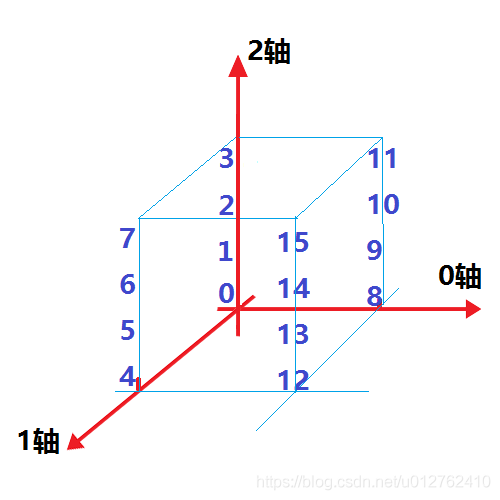

* 將第0軸與第1軸編號交換
* arr.transpose((1,0,2))

In [18]:
arr_T = arr.transpose((1,0,2))  # ->軸編號位置交換
arr_T

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

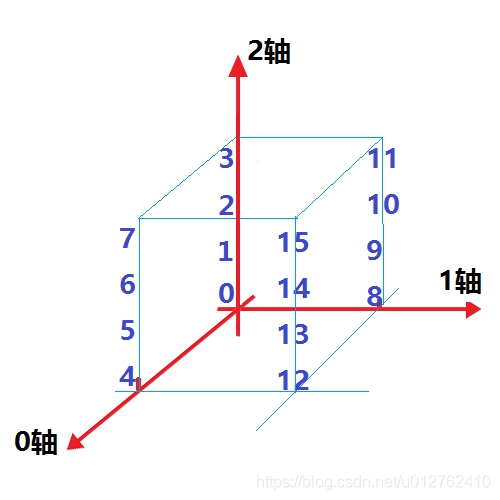

In [20]:
print("原軸(0, 1, 2)")
print(F"第0軸: {arr[0][0][0],arr[1][0][0]}")
print(F"第1軸: {arr[0][0][0],arr[0][1][0]}")
print(F"第2軸: {arr[0][0][0],arr[0][0][1],arr[0][0][2],arr[0][0][3]}")
print("*"*80)
print('新軸(1, 0, 2)')
print(F"第0軸: {arr_T[0][0][0],arr_T[1][0][0]}")
print(F"第1軸: {arr_T[0][0][0],arr_T[0][1][0]}")
print(F"第2軸: {arr_T[0][0][0],arr_T[0][0][1],arr_T[0][0][2],arr_T[0][0][3]}")

原軸(0, 1, 2)
第0軸: (0, 8)
第1軸: (0, 4)
第2軸: (0, 1, 2, 3)
********************************************************************************
新軸(1, 0, 2)
第0軸: (0, 4)
第1軸: (0, 8)
第2軸: (0, 1, 2, 3)


* swapaxes() -> 自行指定要互換的軸編號，然後將資料重新排過
* swqpaxes不會進行<font color=yellow>資料複製</font>，只會回傳view

## 4.2 全域函式: 快速元素級別陣列函式

* 是一種對ndarray裡的資料執行元素級別運算的函式，也稱*ufunc
* 一般函式 -> 可以接受一或多個常量並輸出一到多個常量
* 全域函式 -> 像是包裝了一般函式，把一般函式變成具有<font color=whiteblue>快速向量能力</font>的函式

In [3]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [5]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

* 以上為<font color=yellow>一元(unary)</font>全域函式

In [6]:
x = np.random.randn(8)
x

array([-0.60123111, -0.22484054, -0.70044175,  0.52298154,  1.08886217,
       -0.13066983, -0.00942479, -0.78619133])

In [7]:
y = np.random.randn(8)
y

array([ 0.97291476, -0.24297682,  0.25238767, -0.46560801, -1.19130341,
        0.06999507, -0.71969793,  0.54101444])

In [8]:
np.maximum(x, y)

array([ 0.97291476, -0.22484054,  0.25238767,  0.52298154,  1.08886217,
        0.06999507, -0.00942479,  0.54101444])

* 以上為<font color=yellow>二元(binary)</font>全域函式
* np.maximum(arr1, arr2) -> 會在arr1以及arr2中逐元素找出較大元素

* 少數全域函式會回傳多個陣列，modf就是一個例子
* 它是python內建divmod的向量版本，能將一個浮點數陣列中的分數和整數部分分開回傳

In [10]:
arr = np.random.randn(7) * 5
arr

array([ 0.45321381,  3.58078199,  3.11057096,  0.47374145, -5.40458328,
        1.5087651 ,  4.50978755])

In [11]:
remainder, whole_part = np.modf(arr)

In [12]:
remainder

array([ 0.45321381,  0.58078199,  0.11057096,  0.47374145, -0.40458328,
        0.5087651 ,  0.50978755])

In [13]:
whole_part

array([ 0.,  3.,  3.,  0., -5.,  1.,  4.])

* 可在全域函式使用out參數 -> 可將運算以in-place形式在原陣列完成

In [14]:
arr

array([ 0.45321381,  3.58078199,  3.11057096,  0.47374145, -5.40458328,
        1.5087651 ,  4.50978755])

In [16]:
np.sqrt(arr, out=arr)
arr

<ipython-input-16-70ffef92fcf5>:1: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(arr, out=arr)


array([0.67321156, 1.89229543, 1.76368108, 0.68828878,        nan,
       1.22831799, 2.12362604])

## 一元全域函式
|函式|描述|
|:-:|:-:|
|abs, fabs|逐元素計算絕對值，元素可以是整數，浮點數或虛數|
|sqrt|逐元素計算平方根(arr ** 0.5)|
|square|逐元素做平方(arr ** 2)|
|exp|逐元素做指數($e^{x}$)|
|log, log10, log2, log1p|做自然對數(以*e*為底)，或以10，2為底以及log(1+x)|
|sign|計算每個元素的正負值 : 1->正，0->零，-1->負|
|ceil|逐元素計算向上取整(大於或等於一個數)|
|floor|逐元素計算向下取整(小於或等於一個數)|
|rint|將元素取最靠近的整數，並保留其dtype|
|modf|將陣列的小數和整數部分分開成為不同陣列回傳|
|isnan|回傳一個布林陣列，標示元素是否為NaN(非數字)|
|isfinite, isinf|回傳一個布林陣列，標示元素是否為有限(non-inf，non-NaN)或無限|
|cos, cosh, sin, sinh, tan, tanh|一般或雙曲三角函數|
|arccos, arccosh, arcsin, arcsinh, arctan, arctanh|反三角函數
|logical_not|逐元素計算not x的真值(~arr)|

## 二元全域函式
|函式|描述|
|:-:|:-:|
|add|把陣列對應位置的元素相加|
|subtract|第1個陣列減掉第二個陣列|
|multiply|兩個陣列元素相乘|
|divide, floor_divide|除或整數(捨去整數)|
|power|將第一個陣列中的元素做第二個陣列中所標示的次方|
|maximum, fmax|逐元素找最大值，忽略NaN|
|minimum, fmin|逐元素找最小值，忽略NaN|
|mod|逐元素取餘數|
|copysign|把第二陣列中值的正負號複製到第一個參數中寫的值|
|greater, greater_equal, less, less_equal, equal, not_equal|執行元素及別的比較，產出布林陣列(等於中間放了>，>=，<，<=，==，!=運算子)|
|logical_and, logical_or, logical_xor|計算元素級別的邏輯運算真值(等於中間放了&，\|，^運算子)|

* Numpy的陣列，可以將原本需要使用迴圈才能做到的資料處理工作，精簡成<font color=yellow>陣列表達式</font> -> <font color=white yellow>向量化</font>
* 同一個工作，使用陣列表達式可以比純python實作快上一到兩個級別(時間複雜度級別)

* 對資料進行計算函式 sqrt(x^2 + y^2) -> 兩點之間的距離

In [2]:
points = np.arange(-5, 5, 0.01)  # 1000個等距點
xs, ys = np.meshgrid(points, points)  # 接受一維陣列當參數，產生兩個二維矩陣，這兩個二維矩陣能將原來兩個陣列中所有的元素，配對成一組組的(x, y)

In [3]:
xs

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

In [4]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [6]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

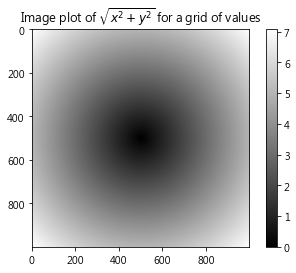

In [13]:
import matplotlib.pyplot as plt
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()
plt.title('Image plot of $\sqrt{x^2 + y^2}$ for a grid of values')

## 用陣列運算表達條件邏輯

* 假設我們有一個布林陣列以及另外兩個裝值的陣列:

In [3]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

* 要求: 
    * 遇到True -> 從xarr取值
    * 遇到False -> 從yarr取值

In [5]:
for x, y, c in zip(xarr, yarr, cond):
    print(x, y, c)

1.1 2.1 True
1.2 2.2 False
1.3 2.3 True
1.4 2.4 True
1.5 2.5 False


In [4]:
result = [(x if c else y) for x, y, c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

* 上述方法是串列綜合表達式(list comprehension)
* 遇到大型陣列速度很慢
* 遇到多維陣列就不能使用

* 使用numpy.where方法<br><br>
* numpy.where 是 x if condition else y 的向量版本<br><br>
* numpy.where(condition, a, b):
    * condition -> 條件式
    * a, b -> 不一定只能放陣列，也可以放整數<br><br>
* 使用情況 -> 用一個陣列建立一個新陣列

In [6]:
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [8]:
arr = np.random.randn(4, 4)
arr

array([[ 0.78580684, -0.43219328, -0.51676211, -1.21857602],
       [ 0.18389528,  0.30956878,  0.64232659,  0.79748713],
       [-1.34274174,  1.58124512, -0.79998266,  0.55962801],
       [-0.30939809,  0.65936569, -0.21625927, -1.03458545]])

* 將arr的正數改為2，負數改為-2

In [10]:
arr > 0

array([[ True, False, False, False],
       [ True,  True,  True,  True],
       [False,  True, False,  True],
       [False,  True, False, False]])

In [9]:
result = np.where(arr > 0, 2, -2)
result

array([[ 2, -2, -2, -2],
       [ 2,  2,  2,  2],
       [-2,  2, -2,  2],
       [-2,  2, -2, -2]])

* np.where可以混合使用常數與陣列 -> 將arr中正數換成2，負數不變

In [11]:
result = np.where(arr > 0, 2, arr)
result

array([[ 2.        , -0.43219328, -0.51676211, -1.21857602],
       [ 2.        ,  2.        ,  2.        ,  2.        ],
       [-1.34274174,  2.        , -0.79998266,  2.        ],
       [-0.30939809,  2.        , -0.21625927, -1.03458545]])

## 數學和統計方法

* 陣列類別有一些數學方法，用來計算整個陣列或沿著軸計算統計資料 -> 聚合函數(aggregation, reduction)
* e.g.
    * sum
    * mean
    * std

In [13]:
arr = np.random.randn(5, 4)
arr

array([[ 0.63923888,  0.76236055,  1.03770826,  1.30376253],
       [-0.53656575,  0.47427232,  0.29319784, -1.22492253],
       [ 0.9735649 , -0.97686161,  1.04860218,  0.78463503],
       [-0.40006517, -1.69588471, -2.41730206,  0.70827198],
       [-0.66973937, -0.32002087,  0.05643955,  0.03875258]])

In [14]:
arr.mean()

-0.006027773510994898

In [15]:
np.mean(arr)

-0.006027773510994898

In [16]:
arr.sum()

-0.12055547021989796

In [17]:
np.sum(arr)

-0.12055547021989796

* mean 或 sum 可以接收一個axis參數 -> 計算指定軸的統計資料，並回傳一個比原本陣列維度低的陣列

In [26]:
arr2 = np.arange(20).reshape(5, 4)
arr2

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

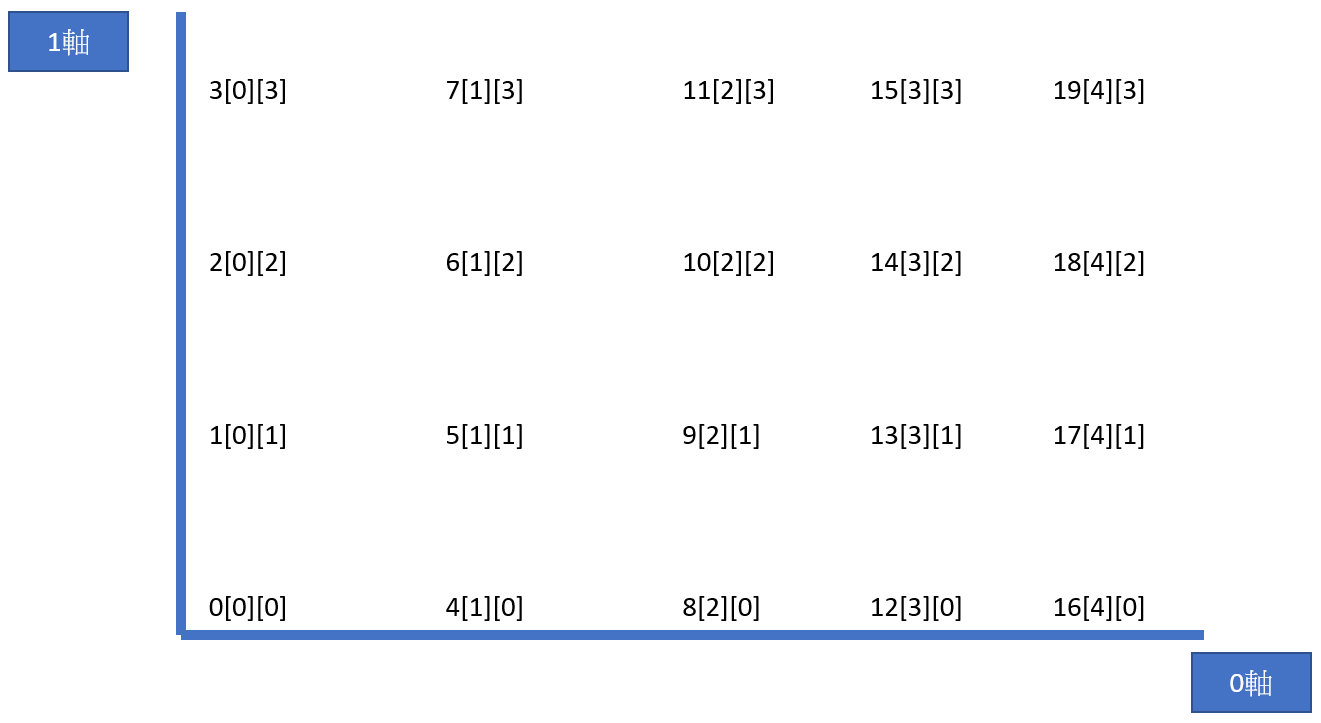

In [27]:
arr2.mean(axis=1)
# 1.5 = (0 + 1 + 2 + 3) / 4
# 5.5 = (4 + 5 + 6 + 7) / 4
# .
# .
# .

array([ 1.5,  5.5,  9.5, 13.5, 17.5])

In [29]:
arr2.sum(axis=0)

array([40, 45, 50, 55])

* cumsum -> 指定軸的元素與前一元素做相加(n = n + n-1) -> <font color=yellow>如果沒有 n-1 則保持n</font>
* cumprod -> 指定軸的元素與前一元素做相乘(n = n * n-1) -> <font color=yellow>如果沒有 n-1 則保持n</font>
* cumsum 及 cumprod 不會做聚合，會回傳結果陣列

* 單一陣列

In [30]:
arr = np.array([1,2,3,4,5,6,7])
arr

array([1, 2, 3, 4, 5, 6, 7])

In [31]:
arr.cumsum()

array([ 1,  3,  6, 10, 15, 21, 28], dtype=int32)

* 多維陣列

In [34]:
arr = np.array([[0,1,2],[3,4,5],[6,7,8]])
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [35]:
arr.cumsum(axis=0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]], dtype=int32)

In [36]:
arr.cumsum(axis=1)

array([[ 0,  1,  3],
       [ 3,  7, 12],
       [ 6, 13, 21]], dtype=int32)

In [39]:
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [37]:
arr.cumprod(axis=0)

array([[ 0,  1,  2],
       [ 0,  4, 10],
       [ 0, 28, 80]], dtype=int32)

In [38]:
arr.cumprod(axis=1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]], dtype=int32)

## 基本的陣列統計方法
|方法|描述|
|:-:|:-:|
|sum|沿著指定軸加總陣列中所有元素，若是零長度陣列，加總結果=0|
|mean|算術平均數，零長度陣列回傳NaN|
|std, var|均方差和變異數，可選擇調整自由度(預設分母=n)|
|min, max|最小值與最大值|
|argmin, argmax|最小值與最大值的索引值|
|cumsum|從元素0開始累加元素和|
|cumprod|從元素0開始累積元素和|

## 布林陣列的方法

* 布林值不是1(True)就是0(False)，所以sum可以用來計算布林陣列中的True值有幾個
* <font color=yellow>非零值都會被視為True</font>

In [40]:
arr = np.random.randn(100)
arr

array([-7.71591646e-01, -6.23846535e-01,  1.78501848e-01, -1.56071357e-01,
        5.92189668e-03, -5.93493993e-01, -2.22525125e+00, -1.02010643e+00,
        1.32195508e-01,  5.47333940e-01,  1.92586688e-01, -6.20642013e-01,
        1.03527283e+00, -1.26369582e+00, -2.36491216e-01,  5.86973528e-01,
       -3.59812787e-01,  5.57172344e-04, -5.61891217e-01, -8.10122351e-02,
       -1.59572148e+00, -3.17616942e-01, -3.40189422e-01, -1.40901216e+00,
        1.32181436e+00,  2.44922367e-02,  9.62682652e-01, -1.90275813e+00,
       -1.07383158e+00,  2.37925143e-01,  3.99895663e-01, -8.46216247e-01,
        4.05157458e-01, -1.54706947e+00, -2.48738081e-01, -1.15785203e+00,
       -1.01630955e+00,  1.76218677e-01,  2.19960361e+00,  9.25471328e-01,
       -4.38054115e-01, -3.30894197e-01,  1.09778663e+00, -3.09494704e-02,
       -9.11649297e-01,  4.52540430e-01, -1.04437276e+00, -2.21220905e-01,
        3.24295848e-01,  2.33280788e+00, -1.15985028e+00, -1.38735994e+00,
        2.90507624e-01,  

In [41]:
(arr > 0).sum()  # 正值有幾個

44

* any() -> 查看陣列是否有至少一個值為True
* all() -> 查看陣列是否全部的值都為True

In [42]:
bools = np.array([False, False, True, False])
bools

array([False, False,  True, False])

In [43]:
bools.any()

True

In [44]:
bools.all()

False

## 排序

* numpy可以用sort的方法進行in-place的排序

In [2]:
arr = np.random.randn(6)
arr

array([0.64105898, 0.21309555, 0.31537593, 0.2883676 , 1.45803927,
       0.42595235])

In [3]:
arr.sort()

In [4]:
arr

array([0.21309555, 0.2883676 , 0.31537593, 0.42595235, 0.64105898,
       1.45803927])

* 傳入軸的資訊，可以獨立排序一個多維陣列裡的所有一維陣列

In [5]:
arr = np.random.randn(5, 3)
arr

array([[ 2.06086246, -0.73093504, -1.72999473],
       [ 0.98434267,  1.38552977, -2.68819683],
       [-0.01047626, -1.75326068, -0.29053282],
       [-0.89336218,  0.3121934 ,  0.5173683 ],
       [ 0.31960042,  0.78635194,  0.34569803]])

In [6]:
arr.sort(1)

In [7]:
arr

array([[-1.72999473, -0.73093504,  2.06086246],
       [-2.68819683,  0.98434267,  1.38552977],
       [-1.75326068, -0.29053282, -0.01047626],
       [-0.89336218,  0.3121934 ,  0.5173683 ],
       [ 0.31960042,  0.34569803,  0.78635194]])

* np.sort是最頂層方法 -> 可以回傳一個排好序的複製陣列，而不是使用in-place

* 下列方式為取得一個陣列的分位數
    * 先排序
    * 再取得特定分位數

In [8]:
large_arr = np.random.randn(1000)
large_arr.sort()

In [9]:
large_arr[int(0.05 * len(large_arr))]  # 取得5%百分位數

-1.5899757473321483

## Unique和其他集合操作

* np.unique -> 用來傳回陣列中排好序的不重複值
* 等同於 sorted(set(names))

In [10]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [11]:
ints = np.array([3,3,3,2,2,1,1,4,4])
np.unique(ints)

array([1, 2, 3, 4])

* np.in1d -> 用來檢查一個陣列中的值是否存在另外一個陣列中，以布林陣列回傳

In [12]:
values = np.array([6,0,0,3,2,5,6])
np.in1d(values, [2,3,6])

array([ True, False, False,  True,  True, False,  True])

## 陣列集合操作
|方法|描述|
|:-:|:-:|
|unique(x)|取得x中排好序的不重複資料|
|intersect1d(x, y)|取得x和y排好序的不重複資料|
|union1d(x, y)|取得x和y排好序的聯集值|
|in1d(x, y)|x中的值是否存在y中，回傳一個布林陣列|
|setdiff1d(x, y)|差集，在x中存在，在y中不存在的元素|
|setxor1d(x, y)|對稱差集，取得要就在x不然就在y的元素，不能同時存在x與y中|

## 4.4從檔案輸入或輸出值到陣列

* np.save 及 np.load 是有效率地從磁碟載入陣列資料的函式
* 陣列預設是以未壓縮原始二進為格式，儲存在副檔名為.npy的檔案中

In [23]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [24]:
np.save('some_array', arr)  # 以.npy檔名儲存陣列(沒加.npy自動加)

In [26]:
np.load('some_array.npy')  # 一定要加.npy檔名

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

* np.savez -> 以未壓縮儲存多個陣列

In [27]:
np.savez('array_archive', a=arr, b=arr)

* 載入.npz檔案時，會得到一個像字典型態物件(dict-like object)，它能延遲地(lazily)載入每個獨立的陣列(要用才動作)

In [28]:
arch = np.load('array_archive.npz')

In [29]:
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [30]:
arch['a']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

* 如果資料是壓縮過的 -> 改用 np.savez_compressed

In [31]:
np.savez_compressed('arrays_compressed.npz', a=arr, b=arr)

## 4.5線性代數

In [34]:
x = np.array([[1.,2.,3.], [4.,5.,6.]])
y = np.array([[6.,23.], [-1,7], [8,9]])

In [35]:
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [36]:
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [41]:
x.dot(y)  # 等同於np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [42]:
np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

* 一個二維陣列和大小相當地一維陣列的矩陣相乘結果，將會回傳一個一維陣列

In [43]:
np.dot(x, np.ones(3))

array([ 6., 15.])

* @符號也是dot

In [44]:
x @ np.ones(3)

array([ 6., 15.])

* numpy.linalg中包含矩陣分解和類似反矩陣跟行列是的函式

In [45]:
from numpy.linalg import inv, qr

In [46]:
X = np.random.randn(5, 5)
X

array([[ 0.83901451, -0.04290725,  0.08567212, -0.36375837, -0.63482343],
       [-0.98959646,  0.4226492 ,  0.81109372, -0.28450427,  0.82461081],
       [-0.64185823, -1.23977148,  0.59801831, -0.06983116, -1.33558269],
       [ 0.17202928,  1.52094532,  0.54683941,  0.75512905, -2.44586227],
       [-1.31173279, -0.24439966, -0.04625647,  1.87082563, -0.14454267]])

* X.T.dot(X) -> 計算X和它的轉置矩陣X.T的內積

In [48]:
mat = X.T.dot(X)

In [49]:
inv(mat)

array([[ 5.16307055, -1.67325205,  6.72381775,  4.02989593,  2.17852073],
       [-1.67325205,  0.8105654 , -2.22646243, -1.33073702, -0.66976243],
       [ 6.72381775, -2.22646243,  9.72828023,  5.33399783,  3.01388304],
       [ 4.02989593, -1.33073702,  5.33399783,  3.41605834,  1.77232046],
       [ 2.17852073, -0.66976243,  3.01388304,  1.77232046,  1.085356  ]])

In [50]:
mat.dot(inv(mat))

array([[ 1.00000000e+00,  2.06146365e-16,  4.33524320e-17,
        -4.59924114e-16, -1.01213031e-15],
       [-4.01539078e-16,  1.00000000e+00,  3.54138053e-16,
        -2.30595071e-16, -2.26184951e-16],
       [ 1.26987694e-15,  7.92256246e-17,  1.00000000e+00,
         3.82449599e-16,  2.23826461e-16],
       [ 2.31290897e-15, -1.32335030e-16,  3.50717464e-15,
         1.00000000e+00,  4.64696229e-16],
       [-4.40714819e-16,  4.96175304e-16, -5.04105480e-17,
        -1.54893869e-15,  1.00000000e+00]])

In [51]:
q, r = qr(mat)
r

array([[-4.7315886 , -1.38469656,  0.74234543,  3.52239161,  0.97019529],
       [ 0.        , -4.36445708, -1.15651032, -2.69290699,  5.21990064],
       [ 0.        ,  0.        , -1.80995697,  0.01231202,  5.64037696],
       [ 0.        ,  0.        ,  0.        , -2.9325709 ,  5.31799112],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.23188726]])

## 常用的numpy.linalg函式
|函式|描述|
|:-:|:-:|
|diag|以一維陣列回傳方形矩陣對角線(或非對角線)元素，轉換一個一維陣列值放到矩陣對角線上，其他非對角線元素填零|
|dot|矩陣乘法|
|trace|計算對角線元素和|
|det|計算矩陣行列式|
|eig|計算方形矩陣的特徵值和特徵向量|
|inv|計算方形矩陣的反矩陣|
|pinv|計算矩陣的 Moore-Penrose 擬反矩陣|
|qr|計算QR分解|
|svd|計算奇異值分解(SVD)|
|solve|A維一個方形矩陣，計算線性方程 Ax = b|
|lstsq|計算 Ax = b 的最小平方解|